In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.vector_ar.vecm import coint_johansen


In [3]:
df = pd.read_csv('DataCoSupplyChainDataset.csv',encoding ='latin')
df

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/15/2018 11:24,Standard Class
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,CASH,4,4,40.000000,399.980011,Shipping on time,0,45,Fishing,Brooklyn,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/20/2016 3:40,Standard Class
180515,DEBIT,3,2,-613.770019,395.980011,Late delivery,1,45,Fishing,Bakersfield,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/19/2016 1:34,Second Class
180516,TRANSFER,5,4,141.110001,391.980011,Late delivery,1,45,Fishing,Bristol,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/20/2016 21:00,Standard Class
180517,PAYMENT,3,4,186.229996,387.980011,Advance shipping,0,45,Fishing,Caguas,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/18/2016 20:18,Standard Class


In [29]:
df.columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Email', 'Customer Fname', 'Customer Id',
       'Customer Lname', 'Customer Password', 'Customer Segment',
       'Customer State', 'Customer Street', 'Customer Zipcode',
       'Department Id', 'Department Name', 'Latitude', 'Longitude', 'Market',
       'Order City', 'Order Country', 'Order Customer Id', 'order date ',
       'Order Id', 'Order Item Cardprod Id', 'Order Item Discount',
       'Order Item Discount Rate', 'Order Item Id', 'Order Item Product Price',
       'Order Item Profit Ratio', 'Order Item Quantity', 'Sales',
       'Order Item Total', 'Order Profit Per Order', 'Order Region',
       'Order State', 'Order Status', 'Order Zipcode', 'Product Card Id',
       'Product Category Id', 'Product Description', 'Produc

In [5]:
df.columns = df.columns.str.strip().str.lower()
print(df.columns.tolist())


['type', 'days for shipping (real)', 'days for shipment (scheduled)', 'benefit per order', 'sales per customer', 'delivery status', 'late_delivery_risk', 'category id', 'category name', 'customer city', 'customer country', 'customer email', 'customer fname', 'customer id', 'customer lname', 'customer password', 'customer segment', 'customer state', 'customer street', 'customer zipcode', 'department id', 'department name', 'latitude', 'longitude', 'market', 'order city', 'order country', 'order customer id', 'order date', 'order id', 'order item cardprod id', 'order item discount', 'order item discount rate', 'order item id', 'order item product price', 'order item profit ratio', 'order item quantity', 'sales', 'order item total', 'order profit per order', 'order region', 'order state', 'order status', 'order zipcode', 'product card id', 'product category id', 'product description', 'product image', 'product name', 'product price', 'product status', 'shipping date (dateorders)', 'shippi

In [37]:
from statsmodels.tsa.stattools import grangercausalitytests

# Test if Product Price Granger-causes Sales
grangercausalitytests(df[['sales', 'product price']], maxlag=4)



Granger Causality
number of lags (no zero) 1
ssr based F test:         F=257.5049, p=0.0000  , df_denom=180515, df_num=1
ssr based chi2 test:   chi2=257.5092, p=0.0000  , df=1
likelihood ratio test: chi2=257.3257, p=0.0000  , df=1
parameter F test:         F=257.5049, p=0.0000  , df_denom=180515, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=73.2037 , p=0.0000  , df_denom=180512, df_num=2
ssr based chi2 test:   chi2=146.4116, p=0.0000  , df=2
likelihood ratio test: chi2=146.3522, p=0.0000  , df=2
parameter F test:         F=73.2037 , p=0.0000  , df_denom=180512, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=39.1303 , p=0.0000  , df_denom=180509, df_num=3
ssr based chi2 test:   chi2=117.3954, p=0.0000  , df=3
likelihood ratio test: chi2=117.3573, p=0.0000  , df=3
parameter F test:         F=39.1303 , p=0.0000  , df_denom=180509, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=24

{1: ({'ssr_ftest': (257.5049314721251, 6.58483583687851e-58, 180515.0, 1),
   'ssr_chi2test': (257.5092109768445, 5.9904375096753244e-58, 1),
   'lrtest': (257.32571681402624, 6.568366869036365e-58, 1),
   'params_ftest': (257.5049314731104, 6.584835833566852e-58, 180515.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (73.20374970333853, 1.6630343215911868e-32, 180512.0, 2),
   'ssr_chi2test': (146.41155474647184, 1.6111457994853024e-32, 2),
   'lrtest': (146.35221197083592, 1.659667017519515e-32, 2),
   'params_ftest': (73.20374970312474, 1.663034321957146e-32, 180512.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (39.130294092234315, 2.8671492560252293e-25, 180509.0, 3),
   'ssr_chi2test': (117.3954346047084, 2.807528721591847e-25, 3),
   'lrtest': (117.35727810906246, 2.8611483002714507e-25, 3),
   'params_ftest': (39.130294092028656, 2.867149256908247e-25, 180509.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [

In [45]:
correlation = df[['order item product price', 'sales']].corr()
print(correlation)


                          order item product price     sales
order item product price                  1.000000  0.789948
sales                                     0.789948  1.000000


In [11]:
df.columns = df.columns.str.strip().str.lower()
df['order date'] = pd.to_datetime(df['order date'], errors='coerce')
df = df.set_index('order date')


In [13]:
df_selected = df[['sales', 'sales per customer', 'order item quantity', 'order item product price',
                  'days for shipping (real)', 'days for shipment (scheduled)']]

# Checking the first few rows
print(df_selected.head())

                      sales  sales per customer  order item quantity  \
order date                                                             
2018-01-31 22:56:00  327.75          314.640015                    1   
2018-01-13 12:27:00  327.75          311.359985                    1   
2018-01-13 12:06:00  327.75          309.720001                    1   
2018-01-13 11:45:00  327.75          304.809998                    1   
2018-01-13 11:24:00  327.75          298.250000                    1   

                     order item product price  days for shipping (real)  \
order date                                                                
2018-01-31 22:56:00                    327.75                         3   
2018-01-13 12:27:00                    327.75                         5   
2018-01-13 12:06:00                    327.75                         4   
2018-01-13 11:45:00                    327.75                         3   
2018-01-13 11:24:00                    327.75

In [15]:
df_selected = df_selected.resample('M').sum()

C:\Users\Hi\AppData\Local\Temp\ipykernel_16916\1881800670.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_selected = df_selected.resample('M').sum()


In [53]:
from statsmodels.tsa.stattools import adfuller

for col in df_selected.columns:
    result = adfuller(df_selected[col].dropna())
    print(f'{col} ADF Statistic: {result[0]}')
    print(f'{col} p-value: {result[1]}')


sales ADF Statistic: -25.75647228467784
sales p-value: 0.0
sales per customer ADF Statistic: -26.145129661318347
sales per customer p-value: 0.0
order item quantity ADF Statistic: -17.267703682752575
order item quantity p-value: 5.887301130748537e-30
order item product price ADF Statistic: -20.023549639840333
order item product price p-value: 0.0
days for shipping (real) ADF Statistic: -15.456300560656704
days for shipping (real) p-value: 2.742455739385373e-28
days for shipment (scheduled) ADF Statistic: -11.607048032783075
days for shipment (scheduled) p-value: 2.5660899962337407e-21


p-value of ADF test for sales: 0.0
sales is stationary.
p-value of ADF test for sales per customer: 0.0
sales per customer is stationary.
p-value of ADF test for order item quantity: 5.887301130748537e-30
order item quantity is stationary.
p-value of ADF test for order item product price: 0.0
order item product price is stationary.
p-value of ADF test for days for shipping (real): 2.742455739385373e-28
days for shipping (real) is stationary.
p-value of ADF test for days for shipment (scheduled): 2.5660899962337407e-21
days for shipment (scheduled) is stationary.


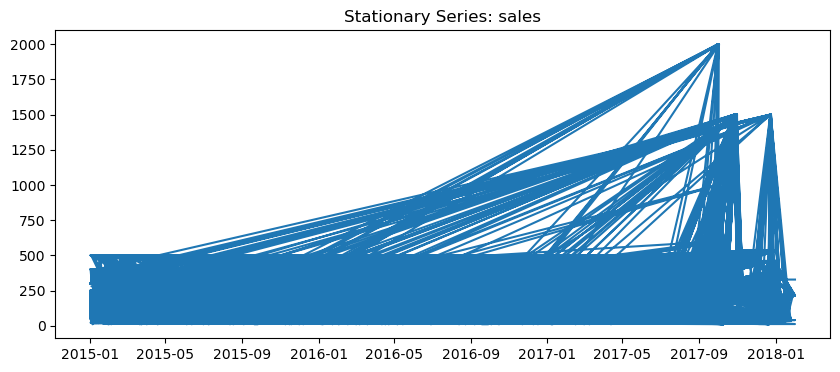

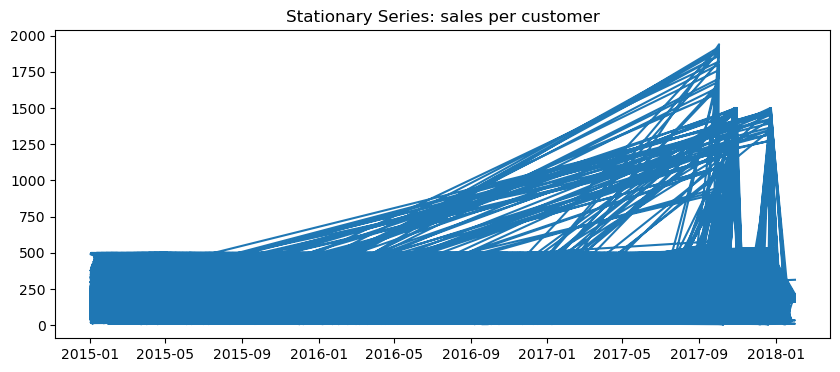

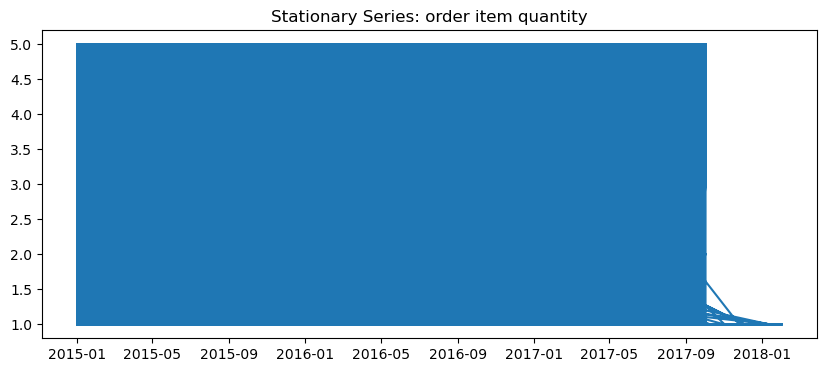

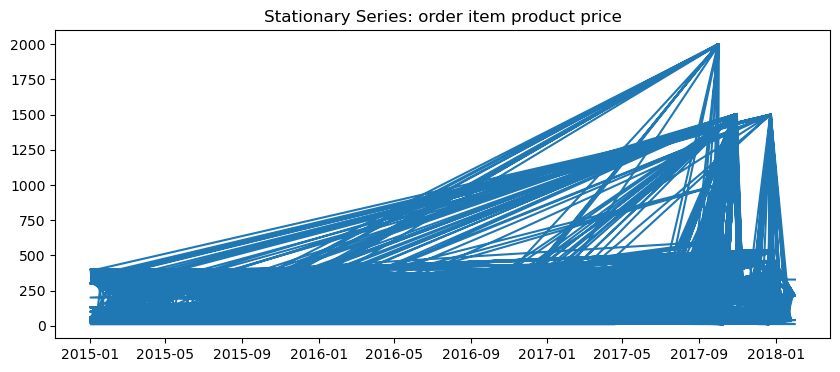

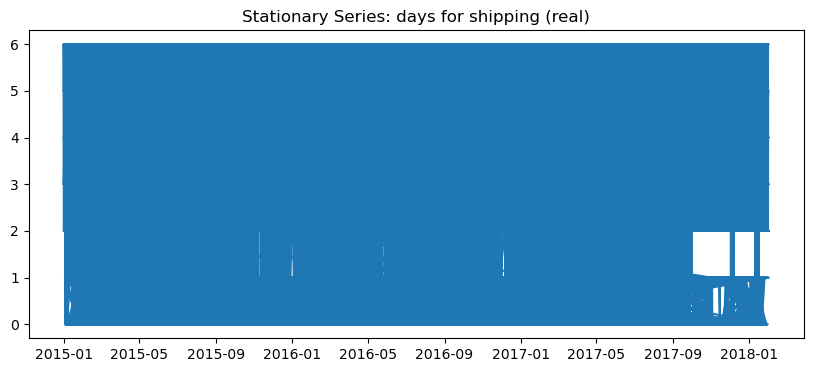

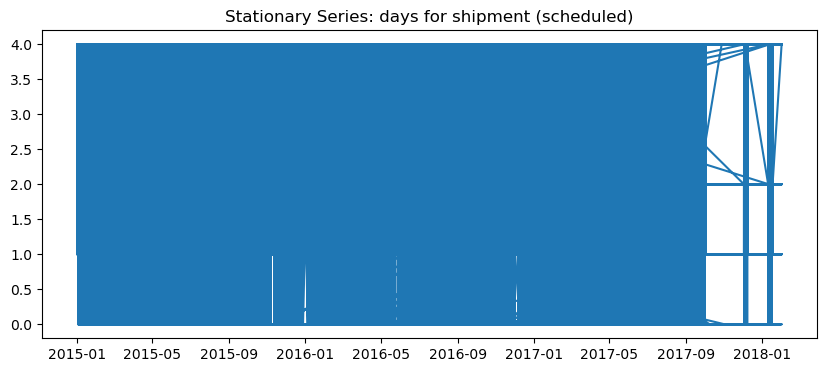

In [61]:
def make_stationary(df, columns):
    stationary_df = df.copy()
    for column in columns:
        series = df[column]
        adftest = adfuller(series.dropna())
        p_value = adftest[1]
        
        print(f'p-value of ADF test for {column}: {p_value}')
        if p_value > 0.05:
            print(f'{column} is non-stationary. Applying differencing...')
            stationary_df[column] = series.diff().dropna()
        else:
            print(f'{column} is stationary.')
    
    return stationary_df

# Specify the columns to check for stationarity
columns_to_check = ['sales', 'sales per customer', 'order item quantity', 'order item product price',
                  'days for shipping (real)', 'days for shipment (scheduled)']

# Apply the make_stationary function to your selected columns
stationary_df = make_stationary(df, columns_to_check)

# Visualize the result
for column in columns_to_check:
    plt.figure(figsize=(10, 4))
    plt.plot(stationary_df[column])
    plt.title(f'Stationary Series: {column}')
    plt.show()

In [19]:
from statsmodels.tsa.stattools import grangercausalitytests

max_lags = 10
y = 'sales'
for i in range(len(df_selected.columns)-1):
    results = grangercausalitytests(df_selected[[y,df_selected.columns[i+1]]],max_lags,verbose = False)
    p_values = [round(results[i+1][0]['ssr_chi2test'][1],4)for i in range(max_lags)]
    print('Column - {} : p_values - {}'.format(df_selected.columns[i+1],p_values))

C:\Users\Hi\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\Hi\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\Hi\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\Hi\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\Hi\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


Column - sales per customer : p_values - [0.0075, 0.008, 0.0001, 0.0001, 0.0004, 0.0, 0.0, 0.0, 0.0, 0.0]
Column - order item quantity : p_values - [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Column - order item product price : p_values - [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Column - days for shipping (real) : p_values - [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Column - days for shipment (scheduled) : p_values - [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [24]:
df_selected.shape

(37, 6)

<Axes: xlabel='order date'>

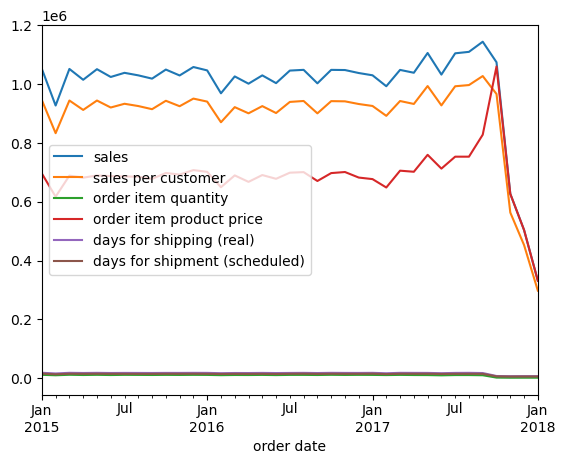

In [26]:
df_selected.plot()

In [28]:

from statsmodels.tsa.statespace.varmax import VARMAX

# Fit VARMA model
model = VARMAX(df_selected, order=(1, 1))
model_fit = model.fit(disp=False)

# Print model summary
#print(model_fit.summary())


C:\Users\Hi\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
C:\Users\Hi\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                                                                          Statespace Model Results                                                                                         
Dep. Variable:     ['sales', 'sales per customer', 'order item quantity', 'order item product price', 'days for shipping (real)', 'days for shipment (scheduled)']   No. Observations:                   37
Model:                                                                                                                                                  VARMA(1,1)   Log Likelihood               -1853.164
                                                                                                                                                       + intercept   AIC                           3904.328
Date:                                                                                                                                             Fri, 02 Aug 2024   BIC                

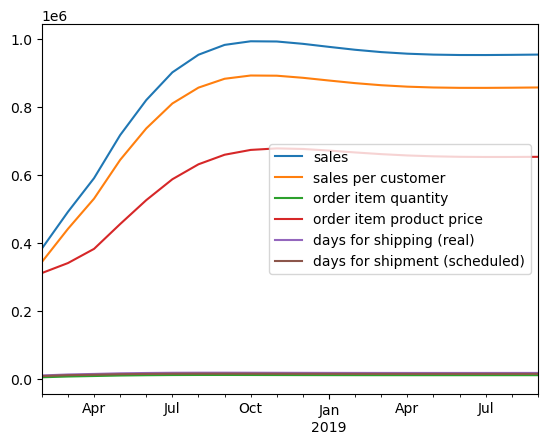

In [59]:
# Forecast future sales
n_steps = 20  # Number of steps to forecast
forecast = model_fit.get_forecast(steps=n_steps)
forecasted_values = forecast.predicted_mean

# Plot the forecasted values
forecasted_values.plot()
plt.show()


C:\Users\Hi\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
C:\Users\Hi\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


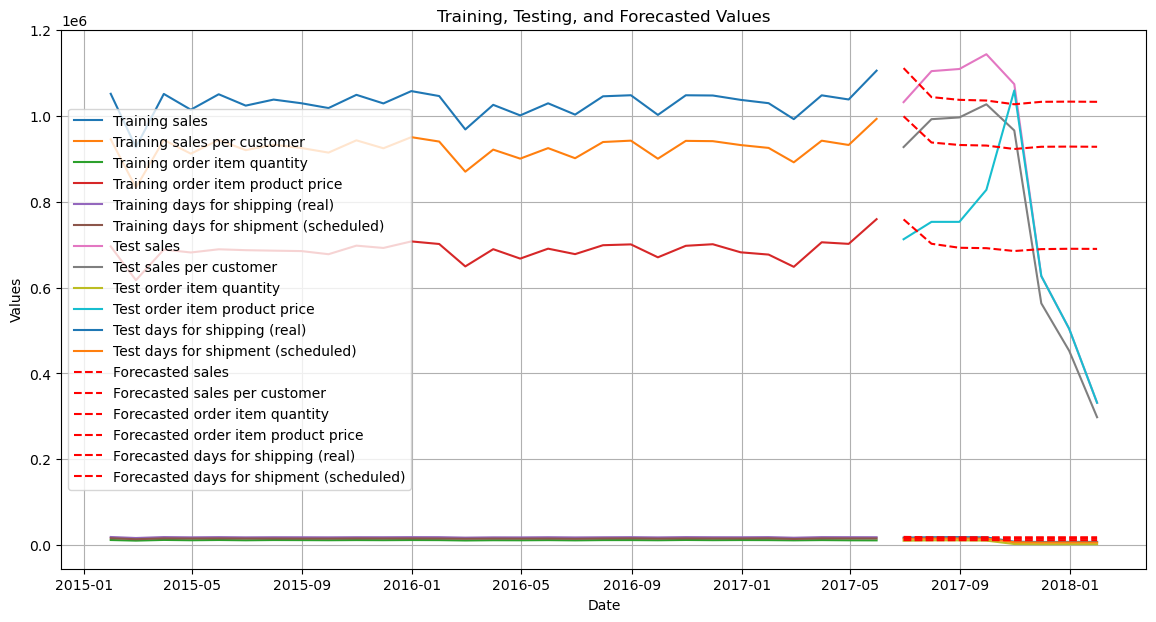

In [54]:
train_size = int(len(df_selected) * 0.8)
train, test = df_selected[:train_size], df_selected[train_size:]

# Fit the model on the training set
model = VARMAX(train, order=(1, 1))
model_fit = model.fit(disp=False)

# Forecast on the testing set
forecast = model_fit.get_forecast(steps=len(test))
forecasted_values = forecast.predicted_mean

# Plot the training, testing, and forecasted values
plt.figure(figsize=(14, 7))

# Plot training data
for column in train.columns:
    plt.plot(train.index, train[column], label=f'Training {column}')

# Plot testing data
for column in test.columns:
    plt.plot(test.index, test[column], label=f'Test {column}')

# Plot forecasted values
for column in forecasted_values.columns:
    plt.plot(test.index, forecasted_values[column], linestyle='--', color='red', label=f'Forecasted {column}')

# Customize plot
plt.title('Training, Testing, and Forecasted Values')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()


C:\Users\Hi\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
C:\Users\Hi\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Hi\AppData\Local\Temp\ipykernel_16916\4099736395.py:12: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(start=last_date, periods=n_steps + 1, freq='M')[1:]


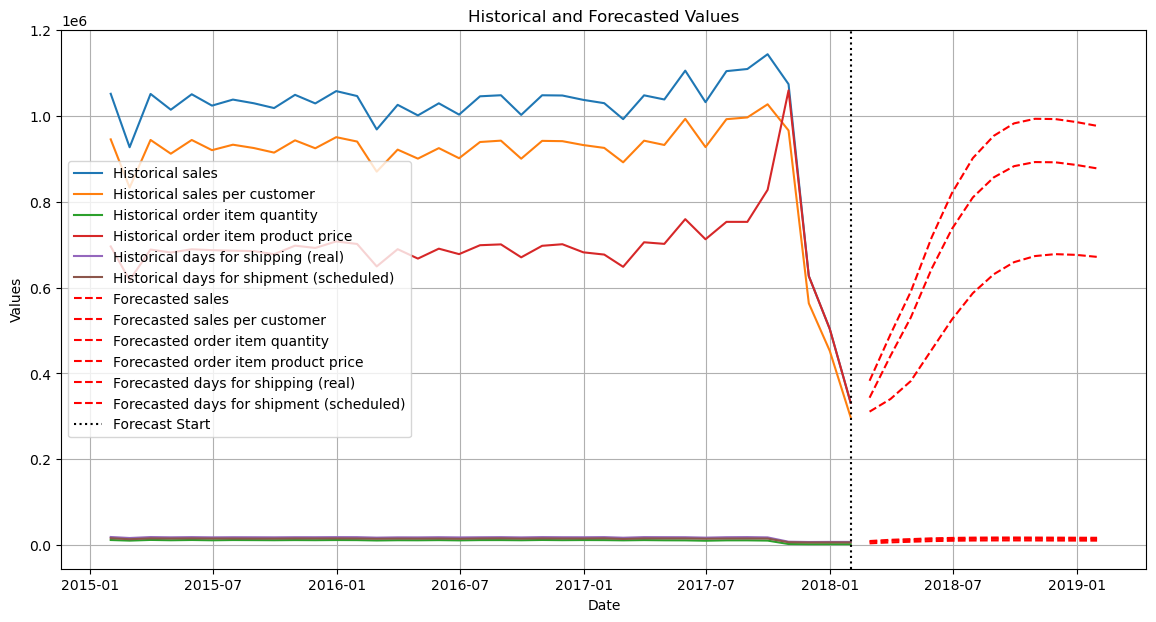

In [63]:
# Fit the model on the entire dataset
model = VARMAX(df_selected, order=(1, 1))
model_fit = model.fit(disp=False)

# Forecast future values for the next 12 months
n_steps = 12  # Forecasting the next 12 months
forecast = model_fit.get_forecast(steps=n_steps)
forecasted_values = forecast.predicted_mean

# Generate a date range for the forecasted period
last_date = df_selected.index[-1]
forecast_dates = pd.date_range(start=last_date, periods=n_steps + 1, freq='M')[1:]

# Create a DataFrame for the forecasted values
forecast_df = pd.DataFrame(forecasted_values, index=forecast_dates, columns=df_selected.columns)

# Combine historical and forecasted data
combined_df = pd.concat([df_selected, forecast_df])

# Plot the historical and forecasted data
plt.figure(figsize=(14, 7))

# Plot historical data
for column in df_selected.columns:
    plt.plot(df_selected.index, df_selected[column], label=f'Historical {column}')

# Plot forecasted data
for column in forecast_df.columns:
    plt.plot(forecast_df.index, forecast_df[column], linestyle='--', color='red', label=f'Forecasted {column}')

# Add vertical line to indicate forecast start
plt.axvline(df_selected.index[-1], color='black', linestyle=':', label='Forecast Start')

# Customize plot
plt.title('Historical and Forecasted Values')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()


# multivariate time series forecasting using LSTM (Long Short-Term Memory)

In [127]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Prepare the data
def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i + sequence_length])
        y.append(data[i + sequence_length])
    return np.array(X), np.array(y)

# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_selected)

# Define the sequence length
sequence_length = 10

# Create sequences
X, y = create_sequences(scaled_data, sequence_length)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Reshape for LSTM input
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2]))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], X_test.shape[2]))


In [129]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(X_train.shape[2]))
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=1)


Epoch 1/50


C:\Users\Hi\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.2905 - val_loss: 0.9756
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 0.2805 - val_loss: 0.9429
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.2708 - val_loss: 0.9112
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.2613 - val_loss: 0.8806
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.2521 - val_loss: 0.8505
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.2433 - val_loss: 0.8207
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.2347 - val_loss: 0.7911
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.2263 - val_loss: 0.7618
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.2182 - val_loss: 0.7329
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.2102 - val_loss: 0.7042
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.2025 - val_loss: 0.6758
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.1950 - val_loss: 0.6474
Epoch 13/50
1/

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


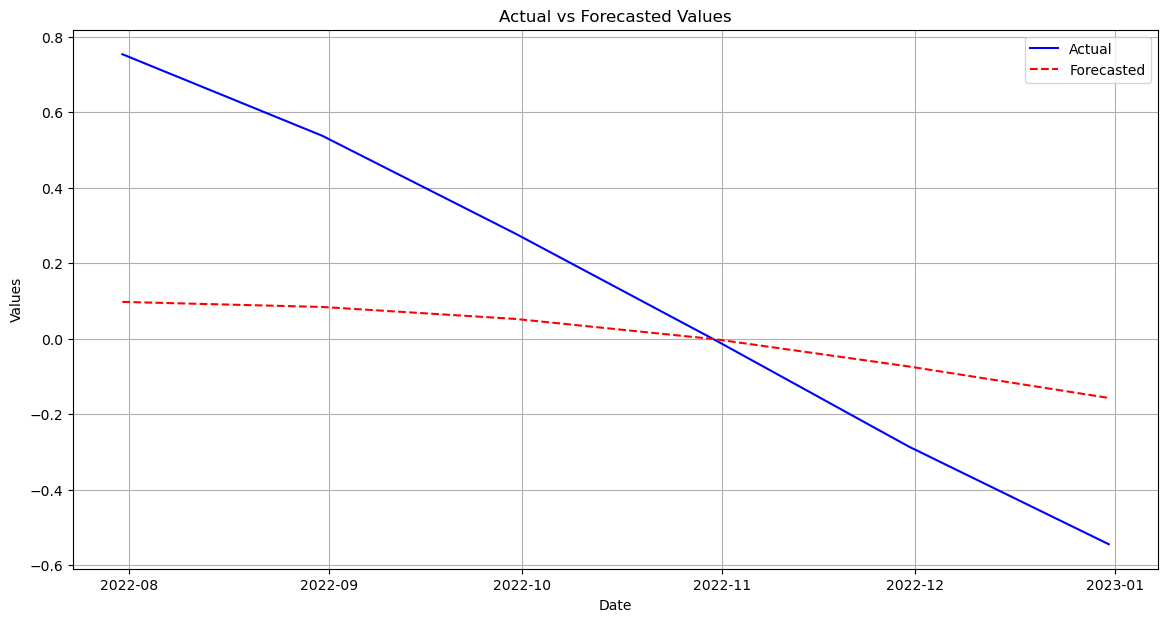

In [131]:
import matplotlib.pyplot as plt

# Generate predictions
predictions = model.predict(X_test)

# Inverse transform the predictions and actual values
predictions = scaler.inverse_transform(predictions)
y_test_inv = scaler.inverse_transform(y_test)

# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(df_selected.index[-len(y_test):], y_test_inv, label='Actual', color='blue')
plt.plot(df_selected.index[-len(predictions):], predictions, label='Forecasted', linestyle='--', color='red')
plt.legend()
plt.title('Actual vs Forecasted Values')
plt.xlabel('Date')
plt.ylabel('Values')
plt.grid(True)
plt.show()


In [133]:
# Define the number of months to forecast
n_months = 12

# Prepare the input for forecasting (use the last sequence from the test set)
last_sequence = X_test[-1:]
forecast = []

# Generate predictions
for _ in range(n_months):
    # Predict the next value
    pred = model.predict(last_sequence)
    forecast.append(pred[0])
    
    # Update the sequence to include the predicted value
    last_sequence = np.append(last_sequence[:, 1:, :], [pred], axis=1)

# Convert forecast to DataFrame
forecast = np.array(forecast)
forecast = scaler.inverse_transform(forecast)

# Create a date range for the forecast
forecast_dates = pd.date_range(start=df_selected.index[-1] + pd.DateOffset(months=1), periods=n_months, freq='M')

# Create a DataFrame for the forecasted values
forecast_df = pd.DataFrame(forecast, index=forecast_dates, columns=df_selected.columns)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


C:\Users\Hi\AppData\Local\Temp\ipykernel_16916\1744671618.py:22: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(start=df_selected.index[-1] + pd.DateOffset(months=1), periods=n_months, freq='M')


In [146]:
forecast_df

,Value
2023-01-31,-0.156649
2023-02-28,-0.200322
2023-03-31,-0.237395
2023-04-30,-0.264789
2023-05-31,-0.281575
2023-06-30,-0.289195
2023-07-31,-0.287811
2023-08-31,-0.282072
2023-09-30,-0.275801
2023-10-31,-0.271379
